In [ ]:
'''
# hacer la conexión a Google Drive
from google.colab import drive
 
colab_flag = True
 
if (colab_flag):
    drive.mount('/content/drive')
 
path = '/content/drive/MyDrive/lol-datasets/'
'''

"\n# hacer la conexión a Google Drive\nfrom google.colab import drive\n \ncolab_flag = True\n \nif (colab_flag):\n    drive.mount('/content/drive')\n \npath = '/content/drive/MyDrive/lol-datasets/'\n"

In [ ]:
pip install lime

     |████████████████████████████████| 276kB 6.4MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp37-none-any.whl size=283846 sha256=53a23b9e4df9ad9de04a84805df3e7c1a21b1f0f3786a891352a37a657ea6113
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns; sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import sklearn
import sklearn.ensemble
import lime
import lime.lime_tabular
from __future__ import print_function
np.random.seed(1)

In [ ]:
'''
if (colab_flag):

    # https://oracleselixir.com/tools/downloads
    #hasta ahora se han probado y funcionan los datasets del: 2020, 2021
    # cambie esta ruta a la necesaria según sea el caso.  
    lol_data = pd.read_csv(path + '/2021-dataset.csv' , header=0, engine='python')
    #print(lol_data.shape)
'''
lol_data = pd.read_csv('https://oracleselixir-downloadable-match-data.s3-us-west-2.amazonaws.com/2021_LoL_esports_match_data_from_OraclesElixir_20210426.csv')


In [ ]:
lol_data

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,playerid,side,position,player,team,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,firstdragon,dragons,...,earned gpm,earnedgoldshare,goldspent,gspd,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT03/1632489,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2021,NaN,0,2021-01-02 07:40:39,1,10.25,1,Blue,top,Khan,DWG KIA,Mordekaiser,Aatrox,Kai'Sa,Pantheon,Aphelios,Lucian,1782,1,7,1,3,23,4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.7744,0.9091,NaN,NaN,...,274.5455,0.196019,10875.0,NaN,209.0,193.0,16,8,5,7.0370,3421.0,5043.0,73.0,2985.0,4493.0,72.0,436.0,550.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,5407.0,7536.0,114.0,4659.0,7592.0,118.0,748.0,-56.0,-4.0,2.0,0.0,1.0,0.0,1.0,1.0
1,ESPORTSTMNT03/1632489,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2021,NaN,0,2021-01-02 07:40:39,1,10.25,2,Blue,jng,Canyon,DWG KIA,Graves,Aatrox,Kai'Sa,Pantheon,Aphelios,Lucian,1782,1,7,1,5,23,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7744,0.9091,NaN,NaN,...,337.8114,0.241189,13850.0,NaN,259.0,41.0,218,110,43,8.7205,3497.0,4314.0,87.0,3055.0,3059.0,62.0,442.0,1255.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,6974.0,8232.0,146.0,4854.0,4827.0,84.0,2120.0,3405.0,62.0,3.0,2.0,0.0,2.0,0.0,3.0
2,ESPORTSTMNT03/1632489,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2021,NaN,0,2021-01-02 07:40:39,1,10.25,3,Blue,mid,ShowMaker,DWG KIA,Zoe,Aatrox,Kai'Sa,Pantheon,Aphelios,Lucian,1782,1,5,0,8,23,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7744,0.9091,NaN,NaN,...,348.9226,0.249122,12700.0,NaN,299.0,250.0,49,17,24,10.0673,3784.0,5171.0,114.0,3301.0,4822.0,91.0,483.0,349.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,6591.0,7827.0,158.0,5013.0,7473.0,143.0,1578.0,354.0,15.0,2.0,3.0,0.0,0.0,0.0,0.0
3,ESPORTSTMNT03/1632489,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2021,NaN,0,2021-01-02 07:40:39,1,10.25,4,Blue,bot,Ghost,DWG KIA,Miss Fortune,Aatrox,Kai'Sa,Pantheon,Aphelios,Lucian,1782,1,3,2,11,23,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7744,0.9091,NaN,NaN,...,309.2929,0.220828,11925.0,NaN,292.0,265.0,27,17,4,9.8316,3540.0,3354.0,94.0,3020.0,3053.0,75.0,520.0,301.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,5202.0,5053.0,130.0,5078.0,4951.0,120.0,124.0,102.0,10.0,0.0,4.0,2.0,1.0,1.0,2.0
4,ESPORTSTMNT03/1632489,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2021,NaN,0,2021-01-02 07:40:39,1,10.25,5,Blue,sup,BeryL,DWG KIA,Galio,Aatrox,Kai'Sa,Pantheon,Aphelios,Lucian,1782,1,1,0,14,23,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7744,0.9091,NaN,NaN,...,130.0337,0.092842,7000.0,NaN,37.0,37.0,0,0,0,1.2458,2049.0,2577.0,14.0,2137.0,2667.0,17.0,-88.0,-90.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,3853.0,4681.0,28.0,3405.0,4231.0,25.0,448.0,450.0,3.0,1.0,4.0,0.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61831,ESPORTSTMNT03/1827545,complete,https://matchhistory.na.leagueoflegends.com/en...,LCS.A,2021,Spring,1,2021-04-24 23:43:14,3,11.06,8,Red,mid,5fire,No Org,Seraphine,Tristana,Orianna,Jinx,Sylas,Alistar,1389,1,6,0,15,25,5,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0799,1.2959,NaN,NaN,...,360.8207,0.252068,10925.0,NaN,215.0,201.0,14,8,2,9.2873,3864.0,5023.0,95.0,3328.0,4425.0,88.0,536.0,598.0

In [ ]:
#des-comentar si se sube el dataset localmente
#lol_data =  pd.read_csv('/content/2021_LoL_esports_match_data_from_OraclesElixir_20210424.csv' , header=0)

In [ ]:
del lol_data["gameid"]
del lol_data["year"]
del lol_data["datacompleteness"]
del lol_data["url"]
del lol_data["league"]
del lol_data["split"]
del lol_data["playoffs"]
del lol_data["date"]
del lol_data["game"]
del lol_data["patch"]
del lol_data["side"]
del lol_data["position"]
del lol_data["player"]
#del lol_data["team"]
del lol_data["champion"]
del lol_data["ban1"]
del lol_data["ban2"]
del lol_data["ban3"]
del lol_data["ban4"]
del lol_data["ban5"]
del lol_data["gamelength"]
del lol_data["teamkills"]
del lol_data["teamdeaths"]
del lol_data["doublekills"]
del lol_data["triplekills"]
del lol_data["quadrakills"]
del lol_data["pentakills"]
del lol_data["firstbloodkill"]
del lol_data["firstbloodassist"]
del lol_data["firstbloodvictim"]
del lol_data["team kpm"]
del lol_data["ckpm"]
del lol_data["opp_dragons"]
del lol_data["elementaldrakes"]
del lol_data["opp_elementaldrakes"]
del lol_data["infernals"]
del lol_data["oceans"]
del lol_data["mountains"]
del lol_data["clouds"]
del lol_data["dragons (type unknown)"]
del lol_data["opp_elders"]
del lol_data["opp_heralds"]
del lol_data["opp_barons"]
del lol_data["opp_towers"]
del lol_data["opp_inhibitors"]
del lol_data["damagetochampions"]
del lol_data["dpm"]
del lol_data["damagemitigatedperminute"]
del lol_data["damageshare"]
del lol_data["damagetakenperminute"]
del lol_data["wpm"]
del lol_data["wcpm"]
del lol_data["vspm"]
del lol_data["earnedgold"]
del lol_data["earned gpm"]
del lol_data["earnedgoldshare"]
del lol_data["total cs"]
del lol_data["goldspent"]
del lol_data["gspd"]
del lol_data["cspm"]
del lol_data["goldat10"]
del lol_data["xpat10"]
del lol_data["csat10"]
del lol_data["opp_goldat10"]
del lol_data["opp_xpat10"]
del lol_data["opp_csat10"]
del lol_data["golddiffat10"]
del lol_data["xpdiffat10"]
del lol_data["csdiffat10"]
del lol_data["killsat10"]
del lol_data["assistsat10"]
del lol_data["deathsat10"]
del lol_data["opp_killsat10"]
del lol_data["opp_assistsat10"]
del lol_data["opp_deathsat10"]
del lol_data["goldat15"]
del lol_data["xpat15"]
del lol_data["csat15"]
del lol_data["opp_goldat15"]
del lol_data["opp_xpat15"]
del lol_data["opp_csat15"]
del lol_data["golddiffat15"]
del lol_data["xpdiffat15"]
del lol_data["csdiffat15"]
del lol_data["killsat15"]
del lol_data["assistsat15"]
del lol_data["deathsat15"]
del lol_data["opp_killsat15"]
del lol_data["opp_assistsat15"]
del lol_data["opp_deathsat15"]

In [ ]:
lol_data = lol_data[lol_data["playerid"]>=100]
lol_data = lol_data.dropna()
teams = lol_data.team.unique()

In [ ]:
lol_data.head()

,playerid,team,result,kills,deaths,assists,firstblood,firstdragon,dragons,elders,firstherald,heralds,firstbaron,barons,firsttower,towers,firstmidtower,firsttothreetowers,inhibitors,wardsplaced,wardskilled,controlwardsbought,visionscore,totalgold,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle
10,100,DWG KIA,1,23,4,41,1.0,1.0,4.0,0.0,1.0,2.0,1.0,1.0,1.0,9.0,1.0,1.0,2.0,102,45,44,254.0,61153,786.0,310,152,76
11,200,Nongshim RedForce,0,4,24,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98,40,37,184.0,44646,812.0,123,96,3
22,100,Nongshim RedForce,0,7,18,18,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,92,30,37,196.0,47184,724.0,192,149,2
23,200,DWG KIA,1,18,7,43,0.0,1.0,4.0,0.0,0.0,0.0,1.0,1.0,1.0,7.0,1.0,1.0,1.0,95,36,39,231.0,55488,778.0,221,151,16
34,100,Nongshim RedForce,0,10,20,16,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,97,42,35,187.0,45566,626.0,137,105,1


In [ ]:
data_filtered = list(lol_data.columns)
data_filtered.remove("playerid")
data_filtered.remove("result")
data_filtered.remove("team")

In [ ]:
Y = lol_data["result"]
X = lol_data[data_filtered]

In [ ]:
X.columns = ["Kills","Deaths","Assists","first Blood","First dragon","total dragons","Elders","first herald","total Heralds","first baron","total barons","First Turret","total towers","First Mid Turret","First 3 towers","inhibitors","Wards","Wards killed","Vision Wards Buyed","Vision score","Total Gold","Minion kills","Monster Kills","Own jungle Monster kills","Enemy Jungle Monster Kills"]

[]

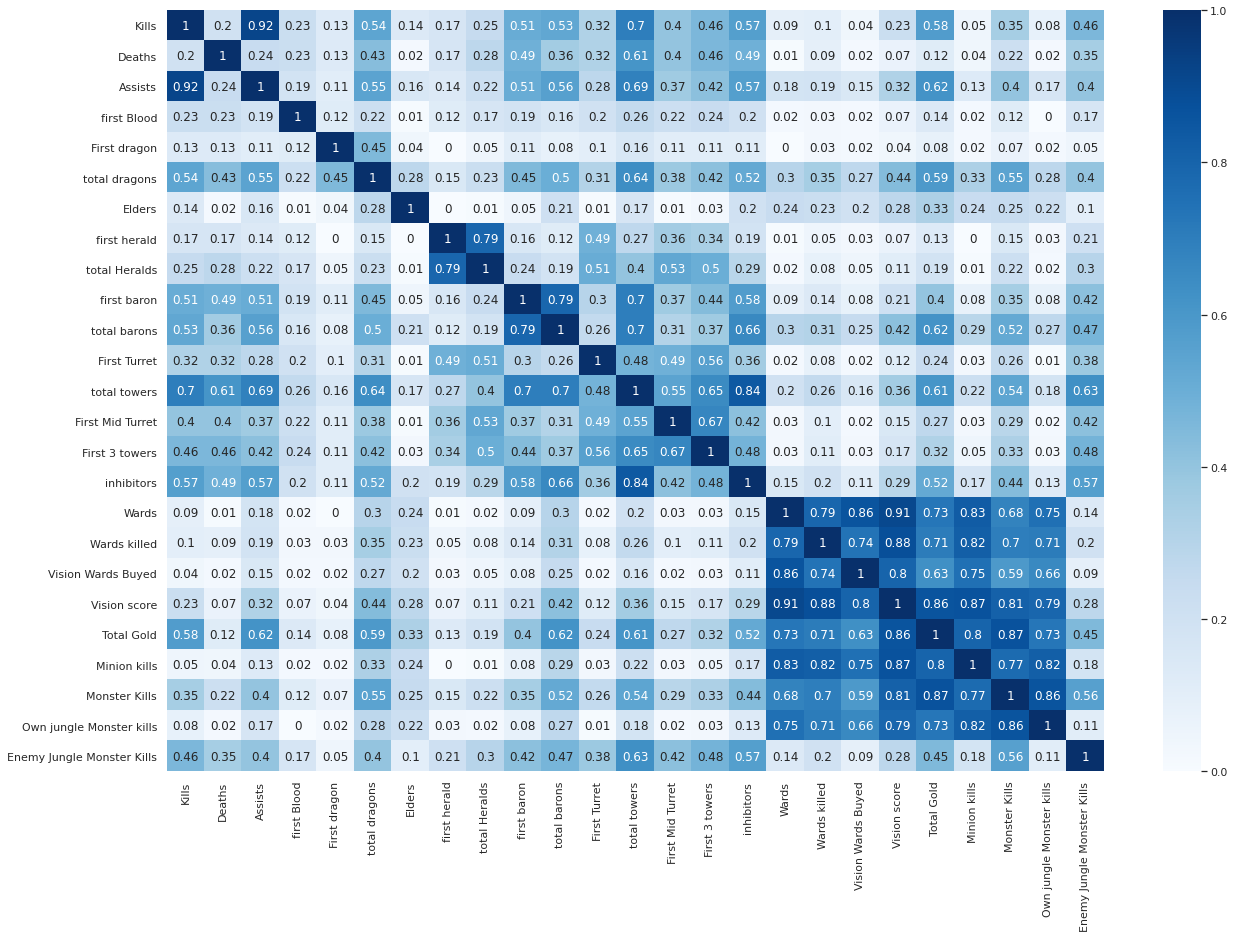

In [ ]:
fig = plt.figure(figsize=(21,14))
sns.heatmap(data=X.corr().round(2).abs(), annot=True, cmap=plt.cm.Blues)
plt.plot()

In [ ]:
print("Número de datos NaN por feature (columna): \n")
print(X.isnull().sum(axis = 0))

Número de datos NaN por feature (columna): 

Kills                         0
Deaths                        0
Assists                       0
first Blood                   0
First dragon                  0
total dragons                 0
Elders                        0
first herald                  0
total Heralds                 0
first baron                   0
total barons                  0
First Turret                  0
total towers                  0
First Mid Turret              0
First 3 towers                0
inhibitors                    0
Wards                         0
Wards killed                  0
Vision Wards Buyed            0
Vision score                  0
Total Gold                    0
Minion kills                  0
Monster Kills                 0
Own jungle Monster kills      0
Enemy Jungle Monster Kills    0
dtype: int64


In [ ]:
y_ = pd.get_dummies(Y)
y_.columns = ['Team Loss','Team Win']

In [ ]:
print(X)
print(y_)

       Kills  Deaths  ...  Own jungle Monster kills  Enemy Jungle Monster Kills
10        23       4  ...                       152                          76
11         4      24  ...                        96                           3
22         7      18  ...                       149                           2
23        18       7  ...                       151                          16
34        10      20  ...                       105                           1
...      ...     ...  ...                       ...                         ...
61811      5      10  ...                       110                           6
61822      4      19  ...                        90                           2
61823     19       4  ...                        99                          20
61834      5      25  ...                        68                          12
61835     25       5  ...                       110                          23

[8616 rows x 25 columns]
       Team Lo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [ ]:
# Scaling
scaler = StandardScaler() # Standardize features by removing the mean and scaling to unit variance

scaler.fit(X_train)

X_train= scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [ ]:
print("X_train:" + str(np.any(np.isnan(X_train))))
print("X_test:" + str(np.any(np.isnan(X_test))))
print("X_va:" + str(np.any(np.isnan(X_val))))
print("y_train:" + str(np.any(np.isnan(y_train))))
print("y_test:" + str(np.any(np.isnan(y_test))))
print("y_val:" + str(np.any(np.isnan(y_val))))

X_train:False
X_test:False
X_va:False
y_train:False
y_test:False
y_val:False


In [ ]:
print("X,Y Shapes:", X.shape, Y.shape)
print("X,Y Train Shapes:", X_train.shape, y_train.shape)
print("X,Y Val Shapes:", X_val.shape, y_val.shape)
print("X,Y Test Shapes:", X_test.shape, y_test.shape)

X,Y Shapes: (8616, 25) (8616,)
X,Y Train Shapes: (5513, 25) (5513, 2)
X,Y Val Shapes: (1379, 25) (1379, 2)
X,Y Test Shapes: (1724, 25) (1724, 2)


n_features:  25
n_classes:  2
Model: "Model_lol_predict"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Inputs_Team (InputLayer)     [(None, 25)]              0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                520       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
_________________________________________________________________
Output (Dense)               (None, 2)                 22        
Total params: 752
Trainable params: 752
Non-trainable params: 0
_________________________________________________________________


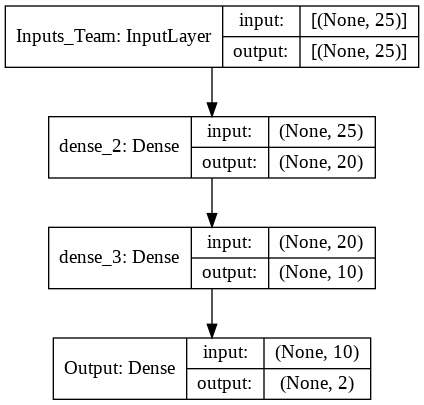

In [ ]:
n_features = X_train.shape[1]
n_classes = y_train.shape[1]

print("n_features: ", n_features)
print("n_classes: ", n_classes)

inputs = keras.Input(shape=(n_features, ), name='Inputs_Team')
x = layers.Dense(20, activation='selu')(inputs)
x = layers.Dense(10, activation='selu')(x)
outputs = layers.Dense(n_classes, activation='softmax', name='Output')(x)
 
model2 = keras.Model(inputs=inputs, outputs=outputs, name='Model_lol_predict')
model2.summary()

keras.utils.plot_model(model2, show_shapes=True)

In [ ]:
# Compilar el modelo. Se utiliza loss Categorical Crossentropy y métrica Accuracy
 
#sgd = tf.keras.optimizers.SGD( lr = 0.01, decay=1e-6, momentum=0.9, clipnorm=1)
 
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'], optimizer='adam')
 
_batch_size = 128 # Numero de ejemplos por gradient update.
         
print("Ejemplos de entrenamiento: {n_t}".format(n_t = X_train.shape[0] ) )
 
 
# Entrenar modelo
history = model2.fit(
    x = X_train,
    y = y_train,
    batch_size=_batch_size,
    epochs=20,
    verbose=2,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(X_val, y_val),
)

Ejemplos de entrenamiento: 5513
Epoch 1/20
44/44 - 1s - loss: 0.6104 - accuracy: 0.7317 - val_loss: 0.3606 - val_accuracy: 0.9036
Epoch 2/20
44/44 - 0s - loss: 0.2742 - accuracy: 0.9262 - val_loss: 0.2148 - val_accuracy: 0.9413
Epoch 3/20
44/44 - 0s - loss: 0.1851 - accuracy: 0.9436 - val_loss: 0.1609 - val_accuracy: 0.9507
Epoch 4/20
44/44 - 0s - loss: 0.1460 - accuracy: 0.9532 - val_loss: 0.1344 - val_accuracy: 0.9565
Epoch 5/20
44/44 - 0s - loss: 0.1225 - accuracy: 0.9601 - val_loss: 0.1177 - val_accuracy: 0.9623
Epoch 6/20
44/44 - 0s - loss: 0.1058 - accuracy: 0.9643 - val_loss: 0.1061 - val_accuracy: 0.9652
Epoch 7/20
44/44 - 0s - loss: 0.0933 - accuracy: 0.9675 - val_loss: 0.0971 - val_accuracy: 0.9695
Epoch 8/20
44/44 - 0s - loss: 0.0835 - accuracy: 0.9717 - val_loss: 0.0902 - val_accuracy: 0.9710
Epoch 9/20
44/44 - 0s - loss: 0.0760 - accuracy: 0.9741 - val_loss: 0.0840 - val_accuracy: 0.9710
Epoch 10/20
44/44 - 0s - loss: 0.0696 - accuracy: 0.9761 - val_loss: 0.0797 - val_accu

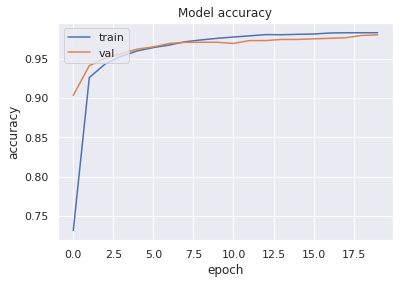

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# Predecir datos de test con el modelo entrenado
Y_pred = model2.predict(X_test)

print("Predicciones para los 3 primeros ejemplos de validación: ") 
print(Y_pred[0:3])

print("\nNotar que cada uno suma 1 gracias a la Softmax (probabilidad válida)")
print(np.sum(Y_pred[0]))

Predicciones para los 3 primeros ejemplos de validación: 
[[3.33e-07 1.00e+00]
 [4.91e-06 1.00e+00]
 [1.00e+00 7.42e-07]]

Notar que cada uno suma 1 gracias a la Softmax (probabilidad válida)
1.0


In [ ]:
# Obtener clase con activación más alta (mayor probabilidad) para todas las predicciones. 
Y_pred = np.argmax(Y_pred, axis=1)

print(Y_pred[0:20])

# Encodear como one-hot para comparar con el output esperado
Y_pred = tf.one_hot(Y_pred, depth=n_classes).numpy()
print(Y_pred)

[1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0]
[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


Model Accuracy sobre conjunto Test: 
0.9802784222737819

Confusion Matrix



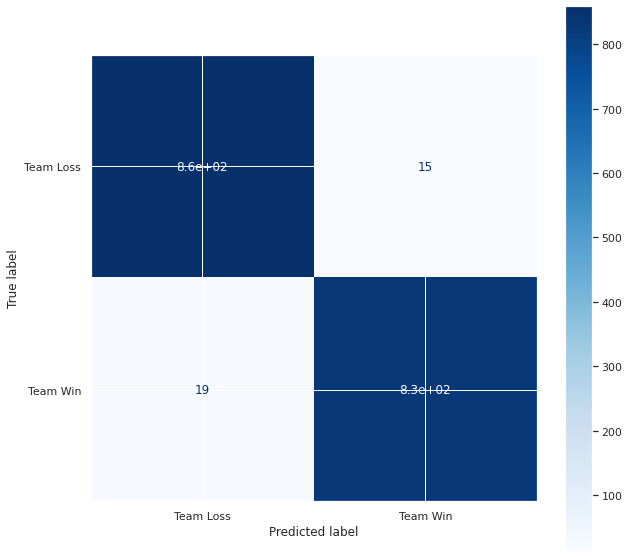

              precision    recall  f1-score   support

   Team Loss       0.98      0.98      0.98       874
    Team Win       0.98      0.98      0.98       850

   micro avg       0.98      0.98      0.98      1724
   macro avg       0.98      0.98      0.98      1724
weighted avg       0.98      0.98      0.98      1724
 samples avg       0.98      0.98      0.98      1724



In [ ]:
print("Model Accuracy sobre conjunto Test: ")
print(accuracy_score(y_test, Y_pred))


target_names = y_.columns


print("\nConfusion Matrix\n")
fig, ax = plt.subplots(figsize=(10, 10))

cm = confusion_matrix(y_test.to_numpy().argmax(axis=1), Y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp = disp.plot(ax=ax,cmap=plt.cm.Blues)
plt.show()


np.set_printoptions(precision=2)
print(classification_report(y_test, Y_pred, target_names=target_names))

In [ ]:
print(teams)

['DWG KIA' 'Nongshim RedForce' 'SolaFide Esports' 'ANEW Rising'
 'Super Sunshine Fruit Basket Warriors' 'Mirage Sport Électronique'
 'Cloud9 Amateur' 'Supernova' 'ANEW Blaze' 'ConViction' 'Rejects Gaming'
 'CowBoySquad Imperials Esports' 'KRC Genk Esports' 'KV Mechelen Esports'
 'Team 7AM' 'Ion Squad' 'Sector One' '4Elements Esports' 'Wichita Wolves'
 '100 Thieves Next' 'Dawn Esports' 'Illinois State University'
 'Mirage Élite' 'Wildcard Gaming' 'Peak Performance Y'
 'Peak Performance X' 'Revival' 'Team Clarity' 'Winthrop University'
 'ReDefy Esports' 'Striking Vipers' 'Evil Geniuses Prodigies' 'BLACKLIST'
 'Sign Us Please' 'FrostFire' 'Not Academy Team'
 'Wildcard Gaming Developmental' 'Barrage.NA'
 'Crystal Cave Gaming Emerald' 'unknown team' 'ANEW Esports'
 'Chilly Mountain Wolves' 'Bay State College' 'Zerolag Esports'
 'The Spawn Esports' 'mCon esports Rotterdam' 'Dynasty' 'PSV Esports'
 'Team Echo Zulu' 'Team THRLL' 'LowLandLions' 'Gen.G' 'KT Rolster' 'T1'
 'Hanwha Life Esports' '

In [ ]:
number = teams.tolist().index("TSM") 

In [ ]:
#number=np.random.randint(0,len(teams))
team = lol_data.loc[lol_data['team'] == teams[number]]
nameTeam = teams[number]
data_team =team[data_filtered].mean(axis=0).to_frame().transpose()
data_team = scaler.transform(data_team)
print(nameTeam+", Number of Games analyzed: "+str(len(team)))


TSM, Number of Games analyzed: 41


In [ ]:
team_predict = model2.predict(data_team)
#print(team_predict[0][1])
print(nameTeam+" has "+str(np.round(team_predict[0][1]*100,decimals=2))+"% of Wining")

TSM has 60.52% of Wining


In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=X.columns, class_names=y_.columns, discretize_continuous=True,  mode='classification')

In [ ]:
#loop a esta celda para ver como afectan los inputs a la red

#i = np.random.randint(0, X_test.shape[0])

exp = explainer.explain_instance(data_team[0], model2.predict, num_features=len(X.columns), top_labels=1)
exp.show_in_notebook(show_table=True, show_all=True)